<a href="https://colab.research.google.com/github/pickles7/kaggle/blob/master/my_titanic_tabular_fastai_ipyndb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.tabular import * 
import numpy as np
import pandas as pd
import pandas as pd

train= pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/fall2018-materials/master/input/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/fall2018-materials/master/input/test.csv')





In [0]:
#Create a categorical variable from the family count 
def family(x):
    if x < 2:
        return 'Single'
    elif x == 2:
        return 'Couple'
    elif x <= 4:
        return 'InterM'
    else:
        return 'Large'


for df in [train, test]:
    df['Title'] = df['Name'].str.split(',').str[1].str.split(' ').str[1]
    df['Title'] = df['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')
    df['Age']=df['Age'].fillna(df['Age'].median())
    df['Fare']=df['Fare'].fillna(df['Fare'].median())
    df['Embarked']=df['Embarked'].fillna('S')
    df['NameLength'] = df['Name'].map(lambda x: len(x))
    df['FamilyS'] = df['SibSp'] + df['Parch'] + 1
    df['FamilyS'] = df['FamilyS'].apply(family)
train.isnull().sum(axis = 0)




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
NameLength       0
FamilyS          0
dtype: int64

In [0]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NameLength,FamilyS
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,23,Couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,51,Couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,22,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,44,Couple
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,24,Single


In [0]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NameLength,FamilyS
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev.,21,Single
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss.,28,Single
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S,Miss.,40,InterM
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr.,21,Single
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr.,19,Single


In [0]:
dep_var = 'Survived'
cat_names = ['Pclass', 'Sex', 'Embarked', 'Title', 'FamilyS']
cont_names = ['Age', 'Fare', 'SibSp', 'Parch', 'NameLength']
procs = [FillMissing, Categorify, Normalize]
test_data = (TabularList.from_df(test, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs))





In [0]:
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(0,200)))
                           .label_from_df(cols=dep_var)
                           .add_test(test_data, label=0)
                           .databunch())


In [0]:
#Shows the Data
data.show_batch()


Pclass,Sex,Embarked,Title,FamilyS,Age,Fare,SibSp,Parch,NameLength,target
1,male,S,Mr.,Couple,0.4873,0.8577,0.5043,-0.4658,0.2304,0
3,male,S,Mr.,Couple,-0.1366,-0.2574,0.5043,-0.4658,0.9849,0
1,female,C,Miss.,Single,0.9553,3.6731,-0.4610,-0.4658,-0.6319,1
3,female,S,Miss.,Single,0.0974,-0.4868,-0.4610,-0.4658,-0.8475,0
3,male,S,Mr.,Single,-0.1366,-0.4868,-0.4610,-0.4658,0.5538,0


In [0]:
#Define our Learner
learn = tabular_learner(data, layers=[300,100], metrics=accuracy)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


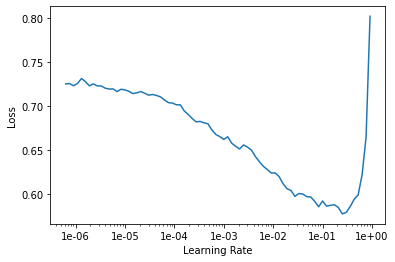

In [0]:
learn.lr_find()
learn.recorder.plot()



In [0]:
#fit the learner
learn.fit(7, 1e-2)  #Number of epocs and the learning rate. learn.save('final_train')


epoch,train_loss,valid_loss,accuracy,time
0,0.637964,0.548792,0.785000,00:00
1,0.539040,0.453080,0.820000,00:00
2,0.497857,0.444171,0.795000,00:00
3,0.477352,0.431444,0.850000,00:00
4,0.458457,0.432035,0.805000,00:00
5,0.445081,0.422821,0.850000,00:00
6,0.428406,0.471661,0.785000,00:00


In [0]:
#Show the results
learn.show_results(rows=10)

Pclass,Sex,Embarked,Title,FamilyS,Age,Fare,SibSp,Parch,NameLength,target,prediction
3,male,S,Mr.,Couple,-0.6046,-0.4982,0.5043,-0.4658,-0.4163,0,0
1,female,C,Mrs.,Couple,0.6433,0.7144,0.5043,-0.4658,2.6017,1,1
3,female,S,Miss.,Single,-0.2926,-0.4855,-0.4610,-0.4658,-0.5241,1,0
1,female,S,Mrs.,Couple,0.4093,0.3700,0.5043,-0.4658,1.8472,1,1
3,male,S,Mr.,Single,0.4093,-0.4831,-0.4610,-0.4658,-0.3085,0,0
3,male,Q,Mr.,Single,-0.1366,-0.4754,-0.4610,-0.4658,-1.1708,0,0
1,male,S,Mr.,Single,1.8912,0.3466,-0.4610,-0.4658,-0.4163,0,0
3,male,S,Master.,Large,-2.1644,-0.2364,2.4351,0.8064,0.3382,0,0
3,female,S,Mrs.,InterM,-0.2146,-0.4247,-0.4610,2.0785,2.3861,1,1
2,female,C,Mrs.,Couple,-1.2285,-0.0661,0.5043,-0.4658,0.8771,1,1


In [0]:
#This will get predictions
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = to_np(np.argmax(predictions, 1))
labels.shape

(418,)

In [0]:
labels

array([0, 0, 0, 0, ..., 1, 0, 0, 1])

In [0]:
#Writing to File
submission=pd.DataFrame(test.loc[:,['PassengerId']])
submission['Survived']=labels
#Any files you save will be available in the output tab below

submission.to_csv('submission.csv', index=False)



In [0]:
x = pd.read_csv('submission.csv')

In [0]:
x

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
from google.colab import files
files.download('submission.csv')